In [10]:
from PIL import Image
from IPython.display import display
import numpy as np

In [11]:
img_load = Image.open("picture/pic16.png")
img = img_load.rotate(180)

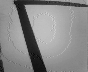

In [12]:
display(img)

In [13]:
img_array = np.array(img).reshape(88 * 72, 1).astype(np.uint8)

GreyScale to Binary Image

In [14]:
row = 72
col = 88
for i in range(row):
    for j in range(col):
        index = (i * col) + j
        if img_array[index] < 64:
            img_array[index] = 255
        else:
            img_array[index] = 0

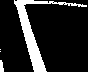

In [15]:
bin_img = Image.fromarray(img_array.reshape(72, 88), 'L')
img_array.reshape(88 * 72, 1)
display(bin_img)

Linear Regression

In [16]:
N = 0
sum_xy = 0
sum_x = 0
sum_y = 0
sum_x2 = 0

h = 0
w = 0

while True:
    if h < row:
        index = (h * col) + w
        if img_array[index] == 255:
            x = h
            y = w
            N = N + 1
            sum_x = sum_x + x
            sum_y = sum_y + y
            sum_xy = sum_xy + (x * y)
            sum_x2 = sum_x2 + (x * x)
        w = (w + 1) % col
        if w == 0: h = h + 1
    else:
        break

# for h in range(row):
#     for w in range(col):
#         index = (h * col) + w
#         if img_array[index] == 255:
#             # x = h - row + 1
#             # y = w - col + 1
#             x = h
#             y = w
#             N = N + 1
#             sum_x = sum_x + x
#             sum_y = sum_y + y
#             sum_xy = sum_xy + (x * y)
#             sum_x2 = sum_x2 + (x * x)

m = ((N * sum_xy) - (sum_x * sum_y)) / ((N * sum_x2) - (sum_x * sum_x))
c = (sum_y - (m * sum_x)) / N

print(m, c)

-0.08980826742149352 35.35755604192337


Varidation

In [17]:
fit_array = np.zeros((72 * 88, 1), dtype=np.uint8)

In [18]:
for h in range(row):
    # x = h - row + 1
    # y = int((m * x) + c)
    # print(x, y)
    # w = y + col - 1
    w = int((m * h) + c)
    if 0 <= w <= col-1:
        print(h ,w)
        index = (h * col) + w
        fit_array[index] = 255

0 35
1 35
2 35
3 35
4 34
5 34
6 34
7 34
8 34
9 34
10 34
11 34
12 34
13 34
14 34
15 34
16 33
17 33
18 33
19 33
20 33
21 33
22 33
23 33
24 33
25 33
26 33
27 32
28 32
29 32
30 32
31 32
32 32
33 32
34 32
35 32
36 32
37 32
38 31
39 31
40 31
41 31
42 31
43 31
44 31
45 31
46 31
47 31
48 31
49 30
50 30
51 30
52 30
53 30
54 30
55 30
56 30
57 30
58 30
59 30
60 29
61 29
62 29
63 29
64 29
65 29
66 29
67 29
68 29
69 29
70 29
71 28


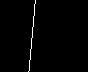

In [19]:
img_pred = Image.fromarray(fit_array.reshape(72, 88), 'L')
display(img_pred)

In [20]:
fit_array.reshape(72, 88)[0][23]

0